<h1> <center> Natural Language Processing in Risk and Finance </h1>
<h3> <center> Developing a </h3>
<center> <small>by <a href="https://juliandoerr.com">Julian Dörr</a></small>
<br>
<br>

_________________________
_________________________

## 1. <a id='toc1_'></a>[About this Course](#toc0_)

Course outline

<a id='toc0_'></a>    
- 1. [About this Course](#toc1_)    
  - 1.1. [What you will learn](#toc1_1_)    
- 2. [What is Natural Language Processing?](#toc2_)    
- 3. [Application of Natural Language Processing in Risk Management](#toc3_)    
  - 3.1. [A real-world use case: Automated Claims Processing](#toc3_1_)    
- 4. [Developing an Automated Claims Processing Model](#toc4_)    
  - 4.1. [Data inspection](#toc4_1_)    
  - 4.2. [Tokenization](#toc4_2_)    
  - 4.3. [Stopwords](#toc4_3_)    
  - 4.4. [Vocabulary](#toc4_4_)    
  - 4.5. [Text vectorization](#toc4_5_)    
    - 4.5.1. [Word count vectorizer](#toc4_5_1_)    
    - 4.5.2. [Weighted word count vectorizer](#toc4_5_2_)    
    - 4.5.3. [Static word embeddings](#toc4_5_3_)    
    - 4.5.4. [Contextualized embeddings](#toc4_5_4_)    
- 5. [References](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

You will find all course material and setup instructions in the following [repository](https://github.com/julienOlivier3/risk-analytics/tree/main/2_nlp).

### 1.1. <a id='toc1_1_'></a>[What you will learn](#toc0_)

- **Fundamental Concepts**: Overview of ML and its relationship with Artificial Intelligence (AI) and Deep Learning (DL).

## 2. <a id='toc2_'></a>[What is Natural Language Processing?](#toc0_)

Natural Language Processing (NLP) is a specialized branch of AI where methods from the field of Machine Learning and Deep Learning are applied to bridge the gap between human communication and machine understanding. 

<img src="img/ai_ml_dl_nlp.png" alt="AI, ML, DL & NLP" style="width: 45vw; min-width: 330px;">
<p><small>Image source: Author</small></p>

<font color="#58e4d4"><b>Artificial Intelligence (AI)</b></font>: **The Broad Umbrella**

AI is the overarching field that encompasses all technologies and systems designed to **simulate human intelligence**. This includes tasks like reasoning, problem-solving, learning, and decision-making.

<font color="#20b49c"><b>Machine Learning (ML)</b></font>: **The Foundation**

Machine learning is a subset of AI that enables systems to **learn from data** and improve their performance over time without being explicitly programmed. ML algorithms identify patterns in data and use these patterns to **make predictions or decisions**.

<font color="#086c5c"><b>Deep Learning (DL)</b></font>: **The Engine Behind Generative AI**

Deep learning is a specialized branch of ML that uses **artificial neural networks** inspired by the human brain. These networks are particularly effective at processing large amounts of **unstructured data**, such as images, text, and audio.

<font color="#08544c"><b>Natural Language Processing (NLP)</b></font>: **A Key Application Area**

Natural language processing is a **specialized branch of AI** that focuses on **enabling machines to understand, interpret, and generate human language**. It bridges the gap between human communication and machine understanding.

NLP draws on concepts from linguistics, computer science, and AI to process and analyze natural language data. It is often **powered by ML and DL techniques**, which help machines learn from vast amounts of text data and improve their language understanding capabilities.

## 3. <a id='toc3_'></a>[Application of Natural Language Processing in Risk Management](#toc0_)

NLP in risk management enhances the ability to **analyze** unstructured data, such as **news articles, social media, and customer feedback, to identify potential risks, emerging trends, and fraudulent activities**. By leveraging techniques like sentiment analysis, named entity recognition, and text summarization, NLP can **automate the extraction of relevant information**, improve accuracy, and **enable faster response times**. 

### 3.1. <a id='toc3_1_'></a>[A real-world use case: Automated Claims Processing](#toc0_)

In the following, we will work on a real-world use case that **insurance companies** typically face. It is the process of **reviewing an insurance claim submitted by policyholders** to the insurance company. 

Instead of dealing with claims manually, **NLP algorithms are used to extract relevant information** from unstructured data sources: claim forms, emails, and documents. Once done, they **automatically categorise and prioritise claims** based on their severity and complexity, ensuring that urgent or complex claims receive prompt attention while routine claims are processed efficiently.

> An **insurance claim** is a formal request made by a policyholder to an insurance company for coverage for losses or damages incurred that are covered under the insurance policy.

Claims processing is a multi-step process which bears great potential for automation using NLP techniques.

<img src="img/claims_processing.png" alt="Claims processing" width="1000" height="300"/>
<p><small>Image source: <a href="https://www.astera.com/de/type/blog/automated-claims-processing/">Astera</a></small></p>

## 4. <a id='toc4_'></a>[Developing an Automated Claims Processing Model](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Data inspection](#toc0_)

In [33]:
import pandas as pd

Read data.

In [34]:
df_claims = pd.read_csv('data/claims.csv')

In [35]:
df_claims.head(3)

,claim_description
0,THE IV WAS MAKING A LEFT TURN ON A GREEN ARROW...
1,CLAIMANT ALLEGES SHE SUFFERED INJURIES IN AN E...
2,"IV PASSENGER SUSTAINED INJURIES, OV AND IV COL..."


Remove null values.

In [36]:
df_claims.claim_description.isnull().sum()

227

In [37]:
df_claims = df_claims[df_claims.claim_description.notnull()]

In [38]:
df_claims.shape[0]

191363

We have data comprising 191,463 claim descriptions.

Lowercase all.

In [39]:
df_claims['claim_description'] = df_claims.claim_description.apply(lambda text: text.lower())

In [40]:
df_claims.sample(3).style

,claim_description
7172,"iv was struck on the p/s by ov in the parking lot, iv overturned and there was damage to both vehicles.iv driver sustained scratches and contusions to her neck, her head, chest and felt pain in her left shoulder, ribs and other body parts on the left side of her body."
127908,"while traveling on 1-20 north near exit 131, a car hydroplane hitting the wall on the interstate which caused the car to spin out of control and hitting the back of the the trailer.(gb info only)"
29997,customer's property damaged during delivery of their appliance order. when doing the haul away the guys damaged the wall and they did not remove their boots and the floor has damage


<Axes: ylabel='Frequency'>

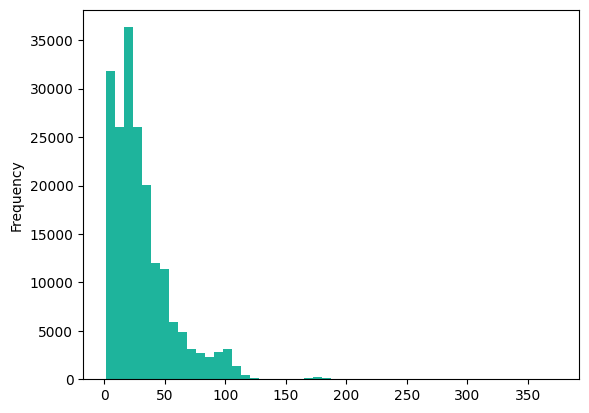

In [41]:
df_claims.claim_description.apply(lambda x: len(x.split(' '))).plot.hist(bins=50, color='#1eb49c')

### 4.2. <a id='toc4_2_'></a>[Tokenization](#toc0_)

Tokenization in NLP is the process of **breaking down text into smaller units called tokens**, which can be **words, phrases, or symbols**, and it is essential for enabling machines to analyze and understand unstructured text data effectively.

In the following we use the `re` module to define our custom tokenization logic. Regex is a powerful tool for string manipulation and can be used to extract tokens from text.

> **Regular expressions** (regex) are sequences of characters that define search patterns, allowing users to efficiently find, match, or manipulate strings of text based on specific criteria.

In [42]:
import re

tokenize_pattern = re.compile(r"(?u)\b\w\w+\b")

- \w: **word character** like letters (both lowercase and uppercase), digits or underscores. \w\w+ means that at least 2 word characters need to follow one another.
- \b: **word boundary** position where a word character is not followed or preceded by another word character.

In [43]:
claim = 'Broken rear window while parked. Window splinter caused damage to other vehicle.'

In [44]:
tokens = tokenize_pattern.findall(claim)

In [45]:
tokens

['Broken',
 'rear',
 'window',
 'while',
 'parked',
 'Window',
 'splinter',
 'caused',
 'damage',
 'to',
 'other',
 'vehicle']

### 4.3. <a id='toc4_3_'></a>[Stopwords](#toc0_)

**Stopwords are common words in a language**, such as "the," "is," and "and," that **carry little semantic value** and are often removed in NLP tasks to enhance the efficiency and accuracy of text analysis by focusing on more meaningful content.

There are pre-defined lists of stopwords for different languages. We use the English stopword list from the `nltk` library.

In [46]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords', quiet=True)

True

In [47]:
stopwords_en = [stopword.lower() for stopword in stopwords.words('english')]

len(stopwords_en)

198

In [48]:
stopwords_en[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

We now tokenize the claims descriptions and remove the stopwords. Moreover, we count how often each word occurs in the corpus of claims descriptions.

> In NLP, a **corpus** is a large and structured collection of authentic text data used for training, testing, and evaluating NLP models.

In [49]:
from tqdm import tqdm
from collections import Counter

word_counter = Counter()

# Process each claim and update the word counter
for claim_desc in tqdm(df_claims.claim_description.values):
    # Split the claim into words using the regex pattern
    words = tokenize_pattern.findall(claim_desc)

    # Filter out empty strings and stopwords and update the counter
    word_counter.update(word for word in words if word and word not in stopwords_en)

# Convert the Counter to a dictionary
word_frequencies = dict(word_counter)

100%|██████████| 191363/191363 [00:07<00:00, 26386.02it/s]


What are the most common words found in the corpus.

In [50]:
word_counter.most_common(10)

[('iv', 76320),
 ('vehicle', 55795),
 ('damage', 47147),
 ('ov', 46545),
 ('driver', 46366),
 ('injuries', 38956),
 ('claimant', 31255),
 ('rear', 28871),
 ('front', 27642),
 ('struck', 26354)]

This gives a clear picture of the domain of the text data: Insurance!

### 4.4. <a id='toc4_4_'></a>[Vocabulary](#toc0_)

We now define the vocabulary which is essential for defining the scope of language the claims processing model can understand and process effectively.

> A **vocabulary** is a set of unique words in a corpus.

In [51]:
vocabulary = sorted(set(word_frequencies.keys()))

In [52]:
len(vocabulary)

93208

Our vocabulary, comprises 93,231 distinct words which is deemed to be a lot.

The Oxford Dictionary includes about 273,000 headwords, with 171,476 currently in use, 47,156 obsolete, and around 9,500 derivatives. It features over 600,000 total word forms, while some estimates suggest the English vocabulary may reach 1 million words, including specialized and foreign terms.

Let us have a look which words have entered our vocabulary.

In [53]:
vocabulary[:10]

['00',
 '000',
 '0000',
 '00000',
 '0000000115192chef',
 '0000000115196',
 '000001',
 '000001593',
 '000007',
 '000019']

Due to our tokenizer definition number sequences are also extracted as tokens (remember that \w matches **word character** like letters *and* digits). Clearly, we do not want these number sequences as part of our vocabulary. Thus, we remove tokens from our vocabulary which are not part of the official English dictionary. Again, we make use of `nltk` which provides an extensive list of English words.

In [54]:
from nltk.corpus import words

nltk.download('words', quiet=True)
dictionary = set(words.words())

In [55]:
dictionary = {word.lower() for word in dictionary}

We now reduce our vocabulary to those words which are part of the dictionary.

In [56]:
vocabulary = [word for word in vocabulary if word in dictionary]

In [57]:
len(vocabulary)

16283

We end up with a vocabulary of 16,283 distinct words.

In [58]:
vocabulary[-10:]

['zip',
 'zipper',
 'zonar',
 'zone',
 'zoned',
 'zoning',
 'zoo',
 'zoom',
 'zoster',
 'zucchini']

### 4.5. <a id='toc4_5_'></a>[Text vectorization](#toc0_)

#### 4.5.1. <a id='toc4_5_1_'></a>[Word count vectorizer](#toc0_)

One of the simplest methods for text vectorization is the **bag-of-words (BoW) representation**, where a BoW **vector has a length equal to the entire vocabulary**, $V$, and its **values** indicate the **frequency of each word**'s occurrence, $tf$, in a text.

BoW vectorization

<img src="img/tf.png" alt="BoW" width="600">
<p><small>Image source: Author</small></p>

In the following, we vectorize the corpus of claims descriptions via the number of occurences of each word from the vocabulary by using `scikit-learn`'s `CountVectorizer` class.

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
vectorizer = CountVectorizer(vocabulary=vocabulary, lowercase=True)

In [61]:
X = vectorizer.fit_transform(df_claims.claim_description.values)

Given the fitted `vectorizer`, we can now transform any string into a count vector representation.

In [62]:
x = vectorizer.transform([claim])

In [63]:
from util import print_sparse_vector

print_sparse_vector(x, vocabulary)

Non-zero elements:
broken   : 1884  	-> 1
damage   : 3708  	-> 1
rear     : 11408 	-> 1
splinter : 13421 	-> 1
vehicle  : 15535 	-> 1
window   : 16035 	-> 2


The resulting vector has $V$ = 16,283 elements with only 6 of it being non-zero. High-dimensional vectors with predominantly zero values are called **sparse vectors**.

> **Sparse vectors** are defined by their **high dimensionality**, with the **majority of** their **elements being zero**. This characteristic makes sparse vector embeddings especially valuable for traditional information retrieval tasks, like keyword matching, where identifying the presence or absence of specific terms is essential.

Some words of the above claim are not part of the vocabulary because they are not in the dictionary ...

In [64]:
'parked' in dictionary, 'caused' in dictionary

(False, False)

... or because they are stopwords.

In [65]:
'while' in stopwords_en, 'to' in stopwords_en, 'other' in stopwords_en

(True, True, True)

#### 4.5.2. <a id='toc4_5_2_'></a>[Weighted word count vectorizer](#toc0_)

**Weighted Bag-of-Words** techniques like TF-IDF (Term Frequency-Inverse Document Frequency) **assign higher relevance to words that appear in fewer documents**, emphasizing their uniqueness by comparing a word's frequency in a specific text to its overall frequency in the corpus.

Tf-idf vectorization

<img src="img/tf-idf.png" alt="Tf-idf" width="800">
<p><small>Image source: Author</small></p>

We use **scikit-learn**'s **TfidfVectorizer** to get a weighted term frequency representation of the claims descriptions.

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
vectorizer = TfidfVectorizer(vocabulary=vocabulary, lowercase=True, use_idf=True, smooth_idf=False, sublinear_tf=False, norm=None)

In [68]:
X = vectorizer.fit_transform(df_claims.claim_description.values)

In [69]:
x = vectorizer.transform([claim])

In [70]:
from util import print_sparse_vector

print_sparse_vector(x, vocabulary)

Non-zero elements:
broken   : 1884  	-> 4.8181356948822005
damage   : 3708  	-> 2.585316845613897
rear     : 11408 	-> 3.1345422376866767
splinter : 13421 	-> 9.760730045216887
vehicle  : 15535 	-> 2.6985098500706153
window   : 16035 	-> 11.538559812314837


The tf-idf value is derived as follows:

$tf\text{-}idf = term \, frequency \times log\left(\frac{number \, of \, documents}{document \, frequency}\right) + 1 = tf \times log\left(\frac{N}{df}\right) + 1$

For the word 'broken', for example, the value can be derived as follows:

In [71]:
# Document frequency: How many documents contain the word 'broken'
word = re.compile(r'(?u)\bbroken\b')

df = df_claims.claim_description.apply(lambda text: bool(word.search(text))).sum()
df

4204

In [72]:
# Number of documents: How many claims are in the dataset
N = df_claims.shape[0]
N

191363

In [73]:
# Term frequency: How many times the word 'broken' appears in the claim
tf = 1

In [74]:
import numpy as np

tf * np.log(N/df) + 1

4.8181356948822005

The sparse, count-based methods mentioned earlier overlook the meanings of words and phrases. Words are not just letter combinations; they carry meanings and usage contexts that reflect their semantics, which go beyond their basic lexical properties.

The following vectorization techniques capture exactly those semantic properties of words.

#### 4.5.3. <a id='toc4_5_3_'></a>[Static word embeddings](#toc0_)

"You shall know a word by the company it keeps!" <br> 
*Firth (1957)*

This means that in order to represent the semantic meaning of a word, knowing its surrounding words is essential.

**Word2Vec uses neural language modelling** to generate vector representations of words. This means that **Deep Learning** techniques are used to translate words into numeric vectors. These **vectors encapsulate** the **meaning of a word** by **considering** the **context provided by adjacent words**.

<img src="img/word2vec.png" alt="Word2vec" width="800">
<p><small>Image source: Author</small></p>

Word2Vec comes in many variants. The variant below employs a shallow neural network where the learning task is to **predict surrounding words given a target word** as input. This approach is called **Continuous Bag of Words** (CBoW).

<img src="img/word2vec_training.png" alt="Word2vec" width="800">
<p><small>Image source: Author</small></p>

The word vector representations are a by-product of the training process generated in the weights matrix in the hidden layer. The word vector representations are called word embeddings.

<img src="img/word2vec_embedding.png" alt="Word embedding" width="800">
<p><small>Image source: Author</small></p>

Training a neural language model to retrieve word embeddings for the vocabulary of our claims corpus is beyond the scope of this course. 

However, there are many **pre-trained word embeddings**. Moving on, we work with [**Global Vectors for Word Representation (GloVe)**](https://nlp.stanford.edu/projects/glove/) vectors that where trained on Wikipedia articles.

In [75]:
import gensim.downloader

word2vec = gensim.downloader.load('glove-wiki-gigaword-50')

Pre-trained word embeddings come with their own vocabulary.

In [76]:
vocabulary = sorted(list(word2vec.key_to_index))

In [77]:
len(vocabulary)

400000

The vocabulary comprises 400,000 tokens.

The static word embedding can then be retrieved as simple key-value pairs.

In [78]:
x = word2vec.get_vector("window")

In [79]:
from util import print_vector

print_vector(x, rounding_digit=4)

The **GloVe embeddings** have only $E$ = 50 elements which is **notably smaller than** the **sparse vectors** introduced before (note their size equaled the vocabulary size $V$, with $V >> E$.). Word embeddings are referred to as **dense vectors** where **most elements contain non-zero values**, capturing rich semantic relationships and syntactic information.

> **Dense vectors** are **lower-dimensional** vector representations of words, phrases or entire texts with **most of the elements containing non-zero values**. Dense vectors are capable to capture nuanced information such as the semantics or meaning of a piece of text and therefore shine in more complex NLP applications like semantic search.

The **semantic information** captured **by word embeddings** becomes apparent when looking at the most similar words to a certain target word.

In [80]:
word2vec.most_similar("insured")

[('insures', 0.7770076990127563),
 ('premiums', 0.7484705448150635),
 ('uninsured', 0.7398187518119812),
 ('nonperforming', 0.7294138073921204),
 ('borrowers', 0.7286937236785889),
 ('homeowners', 0.7117431163787842),
 ('policyholders', 0.7088398933410645),
 ('compensated', 0.7084636688232422),
 ('taxpayers', 0.7040116786956787),
 ('delinquent', 0.7036601305007935)]

Not only are similar words like 'insured' and 'policyholders' close to each other in vector space, but it is also **possible to compute arithmetic expressions** such as `king - man + woman` underlying the semantic meaning captured by word embeddings.

<img src="img/king-analogy-viz.png" alt="Word arithmetics" width="800">
<p><small>Image source: <a href="https://jalammar.github.io/illustrated-word2vec/">Jay Alammar</a></small></p>

In [81]:
word2vec.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

The development of **word embeddings** has significantly advanced AI's capabilities in NLP applications, yet they **still face notable challenges** in effectively representing text as meaningful vectors:

1. **Limitations to words**: While Word2Vec excels at **vectorizing individual words**, it **does not extend this capability to entire texts**, such as descriptions of claims. This restricts its utility in contexts where understanding the full meaning of phrases or sentences is crucial.

A seemingly straightforward solution for translating entire sentences, paragraphs, and documents into dense vector representations involves averaging the word embeddings to create a single text embedding.

In [82]:
claim

'Broken rear window while parked. Window splinter caused damage to other vehicle.'

In [83]:
word_embeddings = np.array([word2vec.get_vector(word) for word in tokenize_pattern.findall(claim.lower())])

In [84]:
x = word_embeddings.mean(axis=0)

In [85]:
print_vector(x, rounding_digit=4)

Empirically, however, it turns out that this approach does not yield optimal results.

2. **Static Nature of Embeddings**: Traditional static embeddings **fail to adapt to the context in which a word appears**. As a result, the **same vector** is assigned to a word **regardless of** its **varying meanings** in different sentences, leading to potential misinterpretations of context and nuance.

    <img src="img/polysemy.png" alt="Polysemy" width="800">
    <p><small>Image source: Author</small></p>

3. **Unknown words**: Word2Vec is inable to handle unknown out-of-vocabulary words but can create vector presentations for the words in the vocabulary.

In order to overcome these limitations, recent advances in NLP have brought up **contextualized** (sentence) **embeddings** which we take a closer look at in the following.

#### 4.5.4. <a id='toc4_5_4_'></a>[Contextualized embeddings](#toc0_)

The most prominent and widespread way to derive contextualized embeddings are Bidirectional Encoder Representations from Transformers ([BERT](https://arxiv.org/abs/1810.04805)) by Google and its many extensions.

There are a number of training and architectural reasons as to why BERT solves the issues faced by static embeddings. The following will give a brief overview:

- **Tokenization**: 
    - BERT uses **subword tokens** which allows to **represent out-of-vocabulary words**, for example, the common insurance term "underwriting" is split into the following subword tokens: `['under', '##writing']`. So even if underwriting has not been in the training corpus, BERT can still transfer it into a vector representation.
    - BERT uses special tokens such as `[CLS]`, representing an entire sentence, and `[SEP]`, representing a token that separates two sentences from one another.


- **Initial Embedding Layer**: each token is converted into a **dense vector representation** through an embedding layer. This layer combines three types of embeddings:
    - Token embeddings: Represent the meaning of each token.
    - Position embeddings: Encode the position of each token in the sequence, allowing BERT to understand word order.
    - Segment embeddings: Indicate whether a token belongs to the first or second sentence in tasks involving sentence pairs.

    In BERT, the input embeddings are created by adding together the token embeddings, segmentation embeddings, and position embeddings.

    <img src="img/embedding_types.png" alt="Embedding types" width="800">
    <p><small>Image source: <a href="https://arxiv.org/pdf/1810.04805">Devlin et al.</a></small></p>

- **Transformer Encoder Layers**: 
    - BERT uses a stack of transformer encoder layers, which apply self-attention mechanisms to compute relationships between all tokens in the input sequence. This allows BERT to capture the context of each token based on its surrounding tokens, both to the left and right (bidirectional context).
    - the embeddings for each token are updated iteratively, incorporating more contextual information at each step.

    Attention layer allows model to learn how tokens are associated to one another.

    <img src="img/attention.png" alt="Attention" width="400">
    <p><small>Image source: <a href="https://mlops.community/explainable-ai-visualizing-attention-in-transformers/">MLOps Community</a></small></p>

- **Smart Pre-training Tasks**:
    
    - BERT employs a Masked Language Model (MLM) during pre-training. In this task, 15% of the tokens in the input are randomly masked, and the model is trained to predict these masked tokens based on their surrounding context. This approach enables BERT to learn bidirectional representations.

        <img src="img/bert_mlm.png" alt="Word embedding" width="800">
        <p><small>Image source: Author</small></p>

- Another pre-training objective is Next Sentence Prediction (NSP). BERT is trained to determine whether one sentence logically follows another. This helps the model understand relationships between sentences.

    <img src="img/bert_nsp.png" alt="Word embedding" width="800">
    <p><small>Image source: Author</small></p>

Let us take a closer look at what BERT does in detail if we provide input text to it. For this purpose we download the weights of the pre-trained `bert-base-uncased` model whose training took place on a dataset consisting of 11,038 unpublished books and English Wikipedia (excluding lists, tables and headers).

In [86]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = BertModel.from_pretrained("bert-base-uncased")

We can then use the model's tokenizer to first tokenize the input text and then use the model to create contextualized embeddings.

In [87]:
encoded_input = tokenizer(claim, return_tensors='pt')
output = bert(**encoded_input)

In [88]:
from pprint import pprint

pprint(encoded_input)

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'input_ids': tensor([[  101,  3714,  4373,  3332,  2096,  9083,  1012,  3332, 27546,  3303,
          4053,  2000,  2060,  4316,  1012,   102]]),
 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [89]:
tokens = tokenizer.convert_ids_to_tokens(encoded_input['input_ids'].tolist()[0])

tokens

['[CLS]',
 'broken',
 'rear',
 'window',
 'while',
 'parked',
 '.',
 'window',
 'splinter',
 'caused',
 'damage',
 'to',
 'other',
 'vehicle',
 '.',
 '[SEP]']

In [90]:
from util import print_bert_vector

print_bert_vector(output.last_hidden_state, tokens)  

[CLS] ->,x(1x768) = [-1.067 -0.474 -0.626 ... -0.068 -0.097 0.156]
broken ->,x(1x768) = [-0.69 0.039 -0.586 ... -0.476 0.07 -0.352]
rear ->,x(1x768) = [-0.214 -0.371 0.071 ... -1.1 -0.461 -0.931]
window ->,x(1x768) = [0.2 -0.116 -0.029 ... -0.529 -0.915 -0.421]
while ->,x(1x768) = [-1.046 -0.632 -0.189 ... -0.716 -0.707 -0.548]
parked ->,x(1x768) = [0.778 -0.812 0.338 ... -0.766 -0.796 -0.03]
. ->,x(1x768) = [-0.827 -0.49 -0.47 ... 0.414 -0.117 -0.341]
window ->,x(1x768) = [0.461 -0.245 0.185 ... -0.411 -0.437 -0.047]
splinter ->,x(1x768) = [0.262 -0.126 -0.163 ... -0.468 -0.7 -0.433]
caused ->,x(1x768) = [-0.425 -0.495 0.009 ... -0.283 -0.725 -0.069]
damage ->,x(1x768) = [-0.395 -0.231 -0.325 ... -0.664 -0.762 0.109]


You may observe a few key aspects:
1. The special tokens `[CLS]` and `[SEP]` each have their own unique embeddings.
2. Punctuation marks are represented by their own distinct embeddings.
3. The token embeddings for the word "window" are not identical; they vary due to the different contexts in which they appear.


There is one last step to take for our claims descriptions to be transferred into fixed-size highly contextualized embeddings.

While BERT captures contextual information at the token level, its default embeddings are not fine-tuned to capture semantic relationships between entire sentences. To generate sentence embeddings, you typically need to pool or average the token embeddings (e.g., mean pooling or using the `[CLS]` token). However, this approach often results in embeddings that are not optimal for sentence similarity or clustering tasks.

This issue is solved by Sentence Transformers ([SBERT](https://sbert.net/#)) which essentially fine-tunes BERT using specific training objectives that encourage sentence embeddings to align with semantic similarity. It does so by using a dataset that contains sentence pairs labeled for entailment, contradiction, and semantic independence.

Moving on we will work with SBERT embeddings using the `sentence-transformers` library.

In [91]:
from sentence_transformers import SentenceTransformer

In [92]:
sbert = SentenceTransformer("all-MiniLM-L6-v2")

In [93]:
x = sbert.encode(claim, convert_to_tensor=True)

In [94]:
print_vector(x, rounding_digit=0)

With the SBERT embeddings we can now show that text that is semantically similar is close in vector space. While semantic distinct text is distant in vector space. Textual similarity can be measured by cosine similarity, for example.

$cos \theta = \frac{x_{1} x_{2}}{||x_1|| ||x_2||} \in [-1; 1]$

Interpretation of values:
- 1: The vectors are identical in direction, indicating maximum similarity. 
- 0: The vectors are orthogonal, meaning they have no relationship or are uncorrelated. 
- -1: The vectors are diametrically opposite, indicating maximum dissimilarity. 
- Values between 0 and 1: Indicate varying degrees of similarity, with values closer to 1 suggesting greater similarity. 
- Values between 0 and -1: Indicate varying degrees of dissimilarity, with values closer to -1 suggesting greater dissimilarity. 

In [95]:
claim_1 = 'Broken rear window while parked. Window splinter caused damage to other vehicle.'

x_1 = sbert.encode(claim)

In [96]:
claim_2 = "Truck struck car on the side while it was pulling into yard. Both cars scratched."

x_2 = sbert.encode(claim_2)

In [97]:
claim_3 = "Someone went into the establishment and stole $501.65 from the safe."

x_3 = sbert.encode(claim_3)

While `claim_1` and `claim_2` refer to claims that are typically covered under an Auto Liability Insurance, `claim_3`, in contrast, is falls under a Crime Insurance policy.

In [98]:
from scipy import spatial

1 - spatial.distance.cosine(x_1, x_2), 1 - spatial.distance.cosine(x_1, x_3)


(0.5580403804779053, 0.32390315305898065)

We can see that SBERT produces embeddings that places the two Auto Liability Insurance claims relatively close in vector space whereas the Crime Insurance claim is more distant to the first Auto Liability Insurance claim. In the following we make use of SBERT embeddings to cluster claims descriptions into verbose categories.  

### Topic modelling

In [99]:
from bertopic import BERTopic

In [100]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

In [119]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=100, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [110]:
vectorizer_model = CountVectorizer(vocabulary=vocabulary, lowercase=True, stop_words=stopwords_en)

In [103]:
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer()

In [120]:
topic_model = BERTopic(
    embedding_model = sbert,
    umap_model = umap_model,
    hdbscan_model = hdbscan_model,
    vectorizer_model = vectorizer_model,
    ctfidf_model = ctfidf_model
)

In [121]:
topics, probs = topic_model.fit_transform(df_claims.claim_description.values)

w:\teaching\risk_analytics\.venv\Lib\site-packages\bertopic\vectorizers\_ctfidf.py:82: RuntimeWarning:

divide by zero encountered in divide



In [148]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,71541,-1_truck_driver_hit_vehicle,"[truck, driver, hit, vehicle, car, trailer, fe...",[the ov was stopped in the further left lane w...
1,0,10443,0_ov_incurred_iv_bumper,"[ov, incurred, iv, bumper, rear, front, report...","[the ov was stopped at a light, when rearended..."
2,1,6586,1_eating_tooth_chicken_food,"[eating, tooth, chicken, food, bit, sick, purc...",[it is alleged that clmt was eating in the caf...
3,2,3780,2_sp_tow_police_claimant,"[sp, tow, police, claimant, occupied, spv, veh...",[sp vehicle rear ended the claimant's vehicle ...
4,3,3640,3_guest_fell_slipped_restroom,"[guest, fell, slipped, restroom, shower, walki...","[guest slipped and fell in parking lot, guest ..."
...,...,...,...,...,...
214,213,105,213_payment_team_dod_estimate,"[payment, team, dod, estimate, 00, delivery, s...",[**payment only** delivery team damaged wall. ...
215,214,103,214_train_metra_trespasser_crossing,"[train, metra, trespasser, crossing, chicago, ...",[metra vehicle #b0094 was park and unoccupied ...
216,215,103,215_consumption_vision_related_caused,"[consumption, vision, related, caused, alleges...",[claimant alleges consumption of elmiron cause...
217,216,103,216_fence_small_pd_wooden,"[fence, small, pd, wooden, servicing, chain, l...",[small pd iv was backing up to service a conta...


In [147]:
topic_model.get_document_info(df_claims.claim_description.values).head(10)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,the iv was making a left turn on a green arrow...,146,146_pedestrian_bicyclist_bicycle_cyclist,"[pedestrian, bicyclist, bicycle, cyclist, cros...","[iv struck pedestrian., iv struck a pedestrian...",pedestrian - bicyclist - bicycle - cyclist - c...,1.000000,False
1,claimant alleges she suffered injuries in an e...,88,88_elevator_entrapped_stuck_trapped,"[elevator, entrapped, stuck, trapped, floor, e...",[passenger elevator was out of service so i ...,elevator - entrapped - stuck - trapped - floor...,0.779509,False
2,"iv passenger sustained injuries, ov and iv col...",-1,-1_truck_driver_hit_vehicle,"[truck, driver, hit, vehicle, car, trailer, fe...",[the ov was stopped in the further left lane w...,truck - driver - hit - vehicle - car - trailer...,0.000000,False
3,claimant alleges she was burned unknown degree...,32,32_coffee_burn_degree_hot,"[coffee, burn, degree, hot, lid, cup, spilled,...","[claimant alleges while in the drive thru, rea...",coffee - burn - degree - hot - lid - cup - spi...,0.311870,False
4,the iv was merging into a construction zone wh...,0,0_ov_incurred_iv_bumper,"[ov, incurred, iv, bumper, rear, front, report...","[the ov was stopped at a light, when rearended...",ov - incurred - iv - bumper - rear - front - r...,0.963229,False
5,ov sitting at stop light waiting to turn when ...,-1,-1_truck_driver_hit_vehicle,"[truck, driver, hit, vehicle, car, trailer, fe...",[the ov was stopped in the further left lane w...,truck - driver - hit - vehicle - car - trailer...,0.000000,False
6,at about 230 pm gavin called stating that whil...,-1,-1_truck_driver_hit_vehicle,"[truck, driver, hit, vehicle, car, trailer, fe...",[the ov was stopped in the further left lane w...,truck - driver - hit - vehicle - car - trailer...,0.000000,False
7,mbr slipped and fell on a puddle of water in c...,42,42_mbr_wh_cart_ee,"[mbr, wh, cart, ee, carts, tripped, fell, mbm,...","[mbr fell in parking lot., mbr tripped over an...",mbr - wh - cart - ee - carts - tripped - fell ...,0.942120,False
8,received a call from joann adkins about her fa...,-1,-1_truck_driver_hit_vehicle,"[truck, driver, hit, vehicle, car, trailer, fe...",[the ov was stopped in the further left lane w...,truck - driver - hit - vehicle - car - trailer...,0.000000,False
9,claimant suffered bodily injury due to picked ...,-1,-1_truck_driver_hit_vehicle,"[truck, driver, hit, vehicle, car, trailer, fe...",[the ov was stopped in the further left lane w...,truck - driver - hit - vehicle - car - trailer...,0.000000,False


In [142]:
topic_model.visualize_topics()

#### *Bonus*: Using Generative AI to improve topic names

In [199]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Access the API key
openai_api_key = os.getenv("OPENAI_API_KEY")

In [200]:
import openai
from bertopic.representation import OpenAI

# Fine-tune topic representations with GPT
client = openai.OpenAI(api_key=openai_api_key)
representation_model = OpenAI(client, model="gpt-4o-mini", chat=True)

In [201]:
topic_model = BERTopic(
    embedding_model = sbert,
    umap_model = umap_model,
    hdbscan_model = hdbscan_model,
    vectorizer_model = vectorizer_model,
    ctfidf_model = ctfidf_model,
    representation_model=representation_model
)

In [202]:
topics, probs = topic_model.fit_transform(df_claims.claim_description.values)

w:\teaching\risk_analytics\.venv\Lib\site-packages\bertopic\vectorizers\_ctfidf.py:82: RuntimeWarning:

divide by zero encountered in divide



In [185]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,69116,-1_Vehicle Incidents and Damage,[Vehicle Incidents and Damage],[the iv was traveling on the street when the i...
1,0,15233,0_Truck accident incidents,[Truck accident incidents],[rear ended another driver left hand turn lane...
2,1,6543,1_Food-related injuries,[Food-related injuries],[claimant alleges she got food poisoning from ...
3,2,4177,2_Legal claim representation,[Legal claim representation],"[:h & z building consulting, inc.; claimant:ma..."
4,3,3783,3_Vehicle accident claims,[Vehicle accident claims],[sp driver was in sp vehicle stopped behind cl...
...,...,...,...,...,...
204,203,104,203_Damage Claims Process,[Damage Claims Process],[**payment only** delivery team damaged wall. ...
205,204,104,204_Property Damage Excavation,[Property Damage Excavation],"[damage to property due to excavation., damage..."
206,205,103,205_Elmiron vision injuries,[Elmiron vision injuries],[claimant alleges consumption of elmiron cause...
207,206,103,206_Oil leakage issues,[Oil leakage issues],[employee forgot to put oil cap after doing an...


In [ ]:
topic_model.save(
    "models/topic_model", 
    serialization="pytorch", 
    save_ctfidf=True, 
    save_embedding_model="all-MiniLM-L6-v2")

### Deployment

When we talk about **deploying a model**, we mean **making the model available for productive use**. This is like putting a finished product on a store shelf so that customers can buy it.

#### <a id='toc4_7_1_'></a>FastAPI for deployment

FastAPI streamlines the deployment process by enabling developers to create **APIs** (Application Programming Interfaces), which facilitate communication between different software programs. An API includes an **inference point** where a **trained model is hosted**, allowing **users** to **send input data** and **receive real-time predictions**, thus integrating the model's capabilities into various applications without requiring users to understand the underlying technology.


In [ ]:
!fastapi dev nlp_fastapi.py

Access the API documentation at [http://127.0.0.1:8000/docs](http://127.0.0.1:8000/docs).

![FastAPI](img/fastapi.gif)


#### <a id='toc4_7_2_'></a>Streamlit for deployment

Streamlit is an open-source app framework that simplifies the deployment of NLP models by allowing developers to **create interactive web applications** with minimal effort. It provides a **user-friendly interface for users to input data and interact with the model** in real-time, making it easier to demonstrate the model's capabilities and gather user feedback.

In [206]:
!streamlit run nlp_streamlit.py

^C


Wait for the local server to open in your web browser.

![Streamlit](img/streamlit.gif)

## 5. <a id='toc5_'></a>[References](#toc0_)

- [What Is Text Vectorization? Everything You Need to Know](https://www.deepset.ai/blog/what-is-text-vectorization-in-nlp)
- [The Illustrated Word2vec](https://jalammar.github.io/illustrated-word2vec/)
- [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)